In [95]:
# 데이터 전처리 및 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

df_train = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(전처리).csv')

In [96]:
df_train.head(2)

,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,여성,55~59,전라남도,20191104,의과외래,정형외과,근골격계통 질환,근골격계통 질환,1,1,0.25,19240,9600,9640,0
1,1,여성,55~59,전라남도,20190806,의과외래,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,1,1,0.25,145680,72800,72880,0


In [97]:
df_dsbjt = pd.DataFrame(df_train['진료과목코드'].value_counts()).reset_index()
df_dsbjt = df_dsbjt.sort_values(by = 'index')
df_dsbjt.columns = ['진료과목', '빈도수(전체환자)']
df_dsbjt.reset_index(inplace = True)
df_dsbjt.drop(['index'], axis = 1, inplace = True)

df_dsbjt_sp1 = pd.DataFrame(df_train[df_train['서식코드'] == '의과입원']['진료과목코드'].value_counts()).reset_index()
df_dsbjt_sp1 = df_dsbjt_sp1.sort_values(by = 'index')
df_dsbjt_sp1.columns = ['진료과목', '빈도수(입원환자)']
df_dsbjt_sp1.reset_index(inplace = True)
df_dsbjt_sp1.drop(['index'], axis = 1, inplace = True)

df_dsbjt_sp2 = pd.DataFrame(df_train[df_train['서식코드'] != '의과입원']['진료과목코드'].value_counts()).reset_index()
df_dsbjt_sp2 = df_dsbjt_sp2.sort_values(by = 'index')
df_dsbjt_sp2.columns = ['진료과목', '빈도수(비입원환자)']
df_dsbjt_sp2.reset_index(inplace = True)
df_dsbjt_sp2.drop(['index'], axis = 1, inplace = True)
df_dsbjt_sp2
df_dsbjt = pd.concat([df_dsbjt, df_dsbjt_sp1['빈도수(입원환자)'], df_dsbjt_sp2['빈도수(비입원환자)']], axis = 1)

df_dsbjt

,진료과목,빈도수(전체환자),빈도수(입원환자),빈도수(비입원환자)
0,가정의학과,379753,18220.0,361533.0
1,결핵과,1086,69.0,1017.0
2,구강악안면외과,10,9.0,1.0
3,내과,4387959,68497.0,4319462.0
4,마취통증의학과,196337,1398.0,194939.0
5,방사선종양학과,10289,49.0,10240.0
6,병리과,73,52.0,21.0
7,비뇨의학과,317961,4318.0,313643.0
8,산부인과,375779,14383.0,361396.0
9,성형외과,15266,1444.0,13822.0


In [98]:
df_dsbjt['빈도수(입원환자)'][np.isnan(df_dsbjt['빈도수(입원환자)'])] = 0 
df_dsbjt['빈도수(비입원환자)'][np.isnan(df_dsbjt['빈도수(비입원환자)'])] = 0 
df_dsbjt['빈도수(입원환자)'] = df_dsbjt['빈도수(입원환자)'].apply(lambda x: int(x))
df_dsbjt['빈도수(비입원환자)'] = df_dsbjt['빈도수(비입원환자)'].apply(lambda x: int(x))

df_dsbjt.head(2)

<ipython-input-98-568e90cc6d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsbjt['빈도수(입원환자)'][np.isnan(df_dsbjt['빈도수(입원환자)'])] = 0
<ipython-input-98-568e90cc6d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dsbjt['빈도수(비입원환자)'][np.isnan(df_dsbjt['빈도수(비입원환자)'])] = 0


,진료과목,빈도수(전체환자),빈도수(입원환자),빈도수(비입원환자)
0,가정의학과,379753,18220,361533
1,결핵과,1086,69,1017


In [99]:
y1, y2, y3 = df_dsbjt['빈도수(전체환자)'].sum(), df_dsbjt['빈도수(입원환자)'].sum(), df_dsbjt['빈도수(비입원환자)'].sum()

df_dsbjt['비율(전체환자)'] =  df_dsbjt['빈도수(전체환자)'].apply(lambda x: round((x / y1) * 100, 1))
df_dsbjt['비율(입원환자)'] =  df_dsbjt['빈도수(입원환자)'].apply(lambda x: round((x / y2) * 100, 1))
df_dsbjt['비율(비입원환자)'] =  df_dsbjt['빈도수(비입원환자)'].apply(lambda x: round((x / y3) * 100, 1))
df_dsbjt

,진료과목,빈도수(전체환자),빈도수(입원환자),빈도수(비입원환자),비율(전체환자),비율(입원환자),비율(비입원환자)
0,가정의학과,379753,18220,361533,2.9,6.4,2.8
1,결핵과,1086,69,1017,0.0,0.0,0.0
2,구강악안면외과,10,9,1,0.0,0.0,0.0
3,내과,4387959,68497,4319462,33.3,24.1,33.5
4,마취통증의학과,196337,1398,194939,1.5,0.5,1.5
5,방사선종양학과,10289,49,10240,0.1,0.0,0.1
6,병리과,73,52,21,0.0,0.0,0.0
7,비뇨의학과,317961,4318,313643,2.4,1.5,2.4
8,산부인과,375779,14383,361396,2.9,5.1,2.8
9,성형외과,15266,1444,13822,0.1,0.5,0.1


['가정의학과', '결핵과', '구강악안면외과', '내과', '마취통증의학과', '방사선종양학과', '병리과', '비뇨의학과', '산부인과', '성형외과', '소아청소년과', '신경과', '신경외과', '안과', '영상의학과', '예방의학과', '외과', '응급의학과', '이비인후과', '일반의', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과교정과', '치과보존과', '피부과', '한방내과', '한방응급', '한방재활의학과', '핵의학과', '흉부외과']


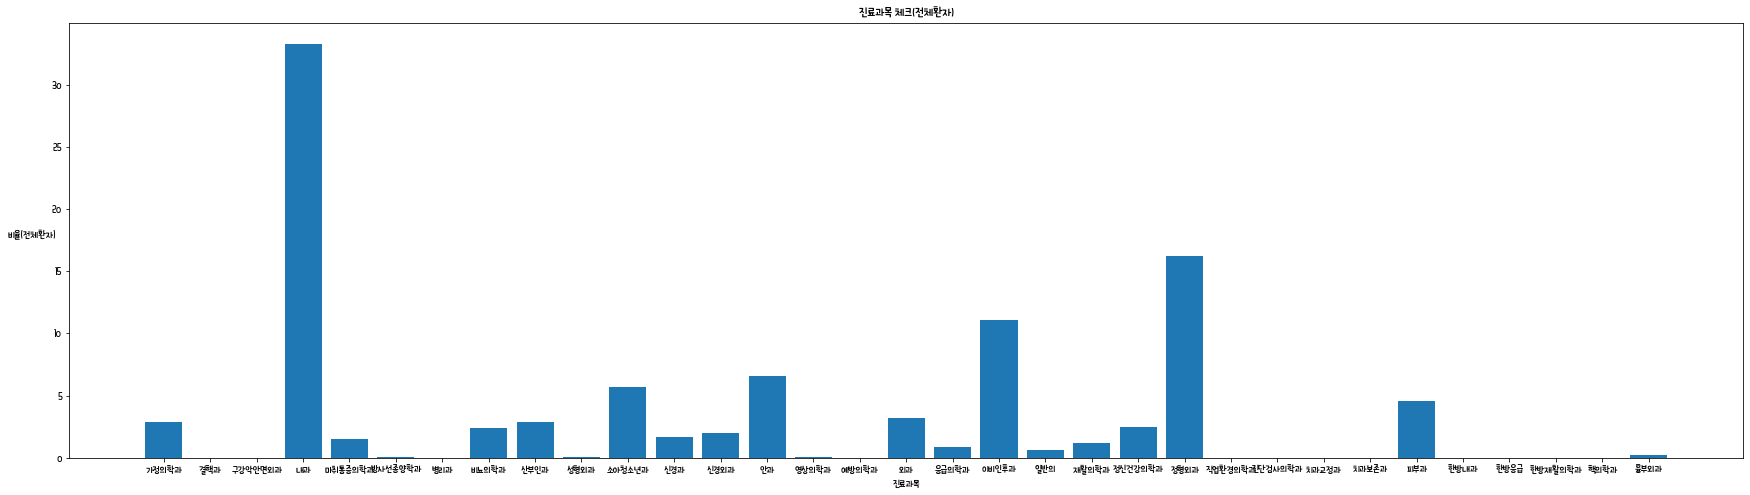

In [117]:
print(list(df_dsbjt['진료과목']))
plt.figure(figsize = (30, 8))
plt.title('진료과목 체크(전체환자)')
plt.bar(df_dsbjt['진료과목'], df_dsbjt['비율(전체환자)'])
# plt.xticks(x, xlabel)
plt.xlabel('진료과목')
plt.ylabel('비율(전체환자)', rotation = 0, labelpad = 20)
plt.show()

['가정의학과', '결핵과', '구강악안면외과', '내과', '마취통증의학과', '방사선종양학과', '병리과', '비뇨의학과', '산부인과', '성형외과', '소아청소년과', '신경과', '신경외과', '안과', '영상의학과', '예방의학과', '외과', '응급의학과', '이비인후과', '일반의', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과교정과', '치과보존과', '피부과', '한방내과', '한방응급', '한방재활의학과', '핵의학과', '흉부외과']


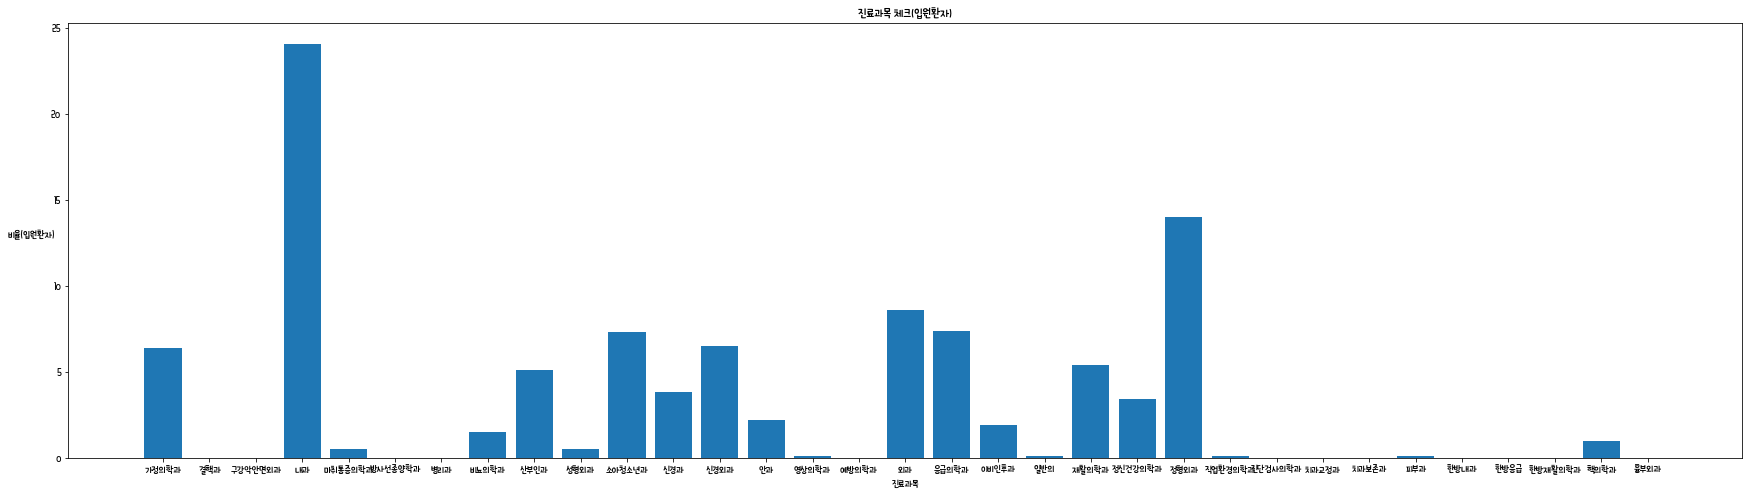

In [118]:
print(list(df_dsbjt['진료과목']))
plt.figure(figsize = (30, 8))
plt.title('진료과목 체크(입원환자)')
plt.bar(df_dsbjt['진료과목'], df_dsbjt['비율(입원환자)'])
# plt.xticks(x, xlabel)
plt.xlabel('진료과목')
plt.ylabel('비율(입원환자)', rotation = 0, labelpad = 20)
plt.show()

['가정의학과', '결핵과', '구강악안면외과', '내과', '마취통증의학과', '방사선종양학과', '병리과', '비뇨의학과', '산부인과', '성형외과', '소아청소년과', '신경과', '신경외과', '안과', '영상의학과', '예방의학과', '외과', '응급의학과', '이비인후과', '일반의', '재활의학과', '정신건강의학과', '정형외과', '직업환경의학과', '진단검사의학과', '치과교정과', '치과보존과', '피부과', '한방내과', '한방응급', '한방재활의학과', '핵의학과', '흉부외과']


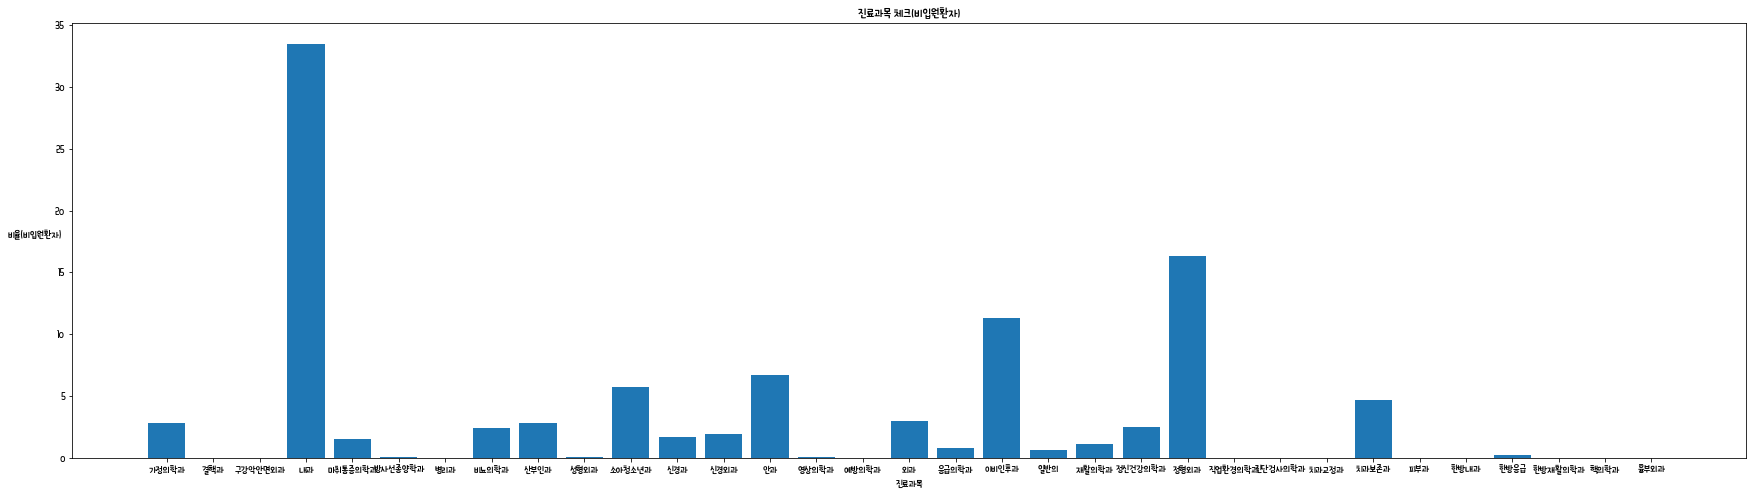

In [119]:
print(list(df_dsbjt['진료과목']))
plt.figure(figsize = (30, 8))
plt.title('진료과목 체크(비입원환자)')
plt.bar(df_dsbjt['진료과목'], df_dsbjt['비율(비입원환자)'])
# plt.xticks(x, xlabel)
plt.xlabel('진료과목')
plt.ylabel('비율(비입원환자)', rotation = 0, labelpad = 20)
plt.show()